In [1]:
import os 
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate, build_logistic_classifier, plot_betas
import pandas as pd

ms = load_from_json(deepcopy(math_spec_json))



## Sanity Check Scenario

Premise: Ensure the simulation framework is operating as intended, without complications from the controller.

Condition(s): Fix the values of:
- $\mathbf u$, the controller update parameters ($k_{qi}, k_{quai}$); and
- $\pmb{\beta}$, the _miner decision population parameter vector_, i.e. the parameter vector for the miner's probabilistic decision on which token to receive as block reward.

Method: MC runs (across realizations of other stochastic variables), generating time series for e.g. miner decisions and proposed block rewards. 

Placeholder has no control action options


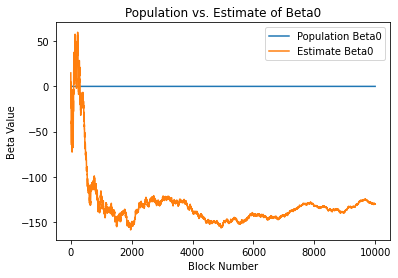

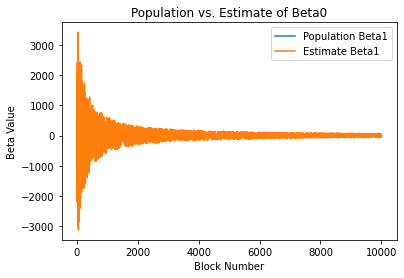

In [2]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V2"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])


for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, .001])


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])

df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

## Sanity Check B

Above sanity check but with changing difficulties

Placeholder has no control action options


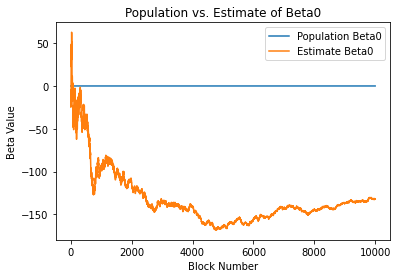

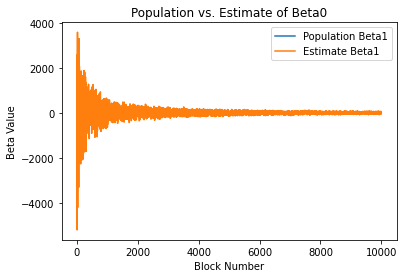

In [5]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V2"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(6000, 1000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [4]:
print(sum([x['Ratio'] for x in state["Historical Mined Ratio"]]) / len(state["Historical Mined Ratio"]))

0.6056900421308241
